In [19]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-12-02 13:26:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-02 13:26:04 (78.9 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [20]:
import os 


os.environ['KAGGLE_USERNAME'] = "ankitkumar2117"

os.environ['KAGGLE_KEY'] = "b553e85b776c6041763213a2f543c737"

! kaggle datasets download -d vikasbhadoria/pneumonia-covid-19-xray-dataset

pneumonia-covid-19-xray-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
unzip_data('pneumonia-covid-19-xray-dataset.zip')

In [22]:
walk_through_dir('Xray images dataset')

There are 2 directories and 1 images in 'Xray images dataset'.
There are 4 directories and 0 images in 'Xray images dataset/Test'.
There are 0 directories and 10 images in 'Xray images dataset/Test/0'.
There are 0 directories and 10 images in 'Xray images dataset/Test/1'.
There are 0 directories and 10 images in 'Xray images dataset/Test/2'.
There are 0 directories and 10 images in 'Xray images dataset/Test/3'.
There are 4 directories and 0 images in 'Xray images dataset/Dataset'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/0'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/1'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/2'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/3'.


In [23]:
train= "Xray images dataset/Dataset/"
test= "Xray images dataset/Test/"

In [24]:
walk_through_dir(train)

There are 4 directories and 0 images in 'Xray images dataset/Dataset/'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/0'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/1'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/2'.
There are 0 directories and 133 images in 'Xray images dataset/Dataset/3'.


In [25]:
walk_through_dir(test)

There are 4 directories and 0 images in 'Xray images dataset/Test/'.
There are 0 directories and 10 images in 'Xray images dataset/Test/0'.
There are 0 directories and 10 images in 'Xray images dataset/Test/1'.
There are 0 directories and 10 images in 'Xray images dataset/Test/2'.
There are 0 directories and 10 images in 'Xray images dataset/Test/3'.


In [26]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (1764, 2093)


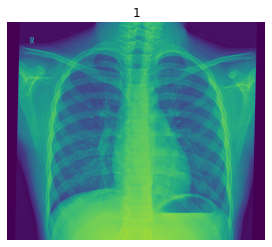

In [27]:
# View a random image 
img = view_random_image(target_dir="/content/Xray images dataset/Dataset/",
                        target_class="1")

In [28]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train,label_mode="categorical",
                                                                image_size=IMG_SIZE)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(test,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 532 files belonging to 4 classes.
Found 40 files belonging to 4 classes.


In [29]:
path = "Xray image dataset checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)

** Building EfficientN0 Model **


In [30]:
from tensorflow.keras import layers
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)

# 5. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 6. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# Creating mode_1
model_1 = tf.keras.Model(inputs, outputs)

16719872/16705208 [==============================] - 0s 0us/step


In [31]:
# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
17/17 [==============================] - 22s 242ms/step - loss: 1.1800 - accuracy: 0.5282
Epoch 2/5
17/17 [==============================] - 5s 212ms/step - loss: 0.8182 - accuracy: 0.7650
Epoch 3/5
17/17 [==============================] - 5s 206ms/step - loss: 0.6530 - accuracy: 0.8252
Epoch 4/5
17/17 [==============================] - 5s 205ms/step - loss: 0.5538 - accuracy: 0.8421
Epoch 5/5
17/17 [==============================] - 5s 205ms/step - loss: 0.4983 - accuracy: 0.8722


In [32]:
model_1.evaluate(test_data)

2/2 [==============================] - 3s 498ms/step - loss: 0.7575 - accuracy: 0.7500


[0.7574571967124939, 0.75]

In [33]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
], name="data_augmentation")

In [34]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(4, activation="softmax", name="output_layer")(x) # same number of outputs as classes
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history_2 = model_2.fit(train_data, epochs=5, validation_steps=int(0.15 * len(test_data)), callbacks=[checkpoint_callback]) 

Epoch 1/5
17/17 [==============================] - 19s 591ms/step - loss: 1.2272 - accuracy: 0.4605
Epoch 2/5
17/17 [==============================] - 11s 547ms/step - loss: 0.9006 - accuracy: 0.7068
Epoch 3/5
17/17 [==============================] - 10s 505ms/step - loss: 0.7259 - accuracy: 0.7801
Epoch 4/5
17/17 [==============================] - 10s 475ms/step - loss: 0.6588 - accuracy: 0.7951
Epoch 5/5
17/17 [==============================] - 10s 491ms/step - loss: 0.5939 - accuracy: 0.8233


In [35]:
model_2.evaluate(test_data)

2/2 [==============================] - 2s 66ms/step - loss: 0.8447 - accuracy: 0.6750


[0.8447172045707703, 0.675000011920929]

In [36]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [37]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [38]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
history_3 = model_2.fit(train_data, epochs=5, validation_steps=int(0.15 * len(test_data)), callbacks=[checkpoint_callback]) 

Epoch 1/5
17/17 [==============================] - 9s 409ms/step - loss: 0.3843 - accuracy: 0.8835
Epoch 2/5
17/17 [==============================] - 9s 451ms/step - loss: 0.3755 - accuracy: 0.8703
Epoch 3/5
17/17 [==============================] - 10s 473ms/step - loss: 0.3749 - accuracy: 0.8665
Epoch 4/5
17/17 [==============================] - 10s 476ms/step - loss: 0.3647 - accuracy: 0.8628
Epoch 5/5
17/17 [==============================] - 9s 446ms/step - loss: 0.3171 - accuracy: 0.8872


In [41]:
model_2.evaluate(test_data)

2/2 [==============================] - 2s 69ms/step - loss: 0.8985 - accuracy: 0.6500


[0.8984800577163696, 0.6499999761581421]

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_4 = Sequential([
  Conv2D(8, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(32, activation="relu"),
  Dense(4, activation='softmax')
])

# Compile the model
model_4.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
17/17 [==============================] - 6s 196ms/step - loss: 28.3743 - accuracy: 0.3233 - val_loss: 1.3021 - val_accuracy: 0.3500
Epoch 2/5
17/17 [==============================] - 5s 172ms/step - loss: 1.1449 - accuracy: 0.4718 - val_loss: 1.1366 - val_accuracy: 0.4750
Epoch 3/5
17/17 [==============================] - 5s 170ms/step - loss: 1.0937 - accuracy: 0.4887 - val_loss: 1.1063 - val_accuracy: 0.4750
Epoch 4/5
17/17 [==============================] - 5s 172ms/step - loss: 1.0637 - accuracy: 0.4906 - val_loss: 1.0642 - val_accuracy: 0.4750
Epoch 5/5
17/17 [==============================] - 5s 171ms/step - loss: 1.0675 - accuracy: 0.4906 - val_loss: 1.1406 - val_accuracy: 0.4750


In [43]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [54]:
def pred_and_plot(model, filename):
  
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  preds=pred.round()
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {preds}")
  plt.axis(False)

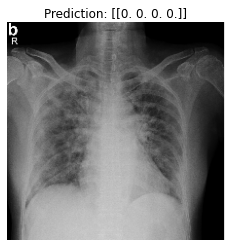

In [55]:
# Test our model 
pred_and_plot(model_1, "/content/Xray images dataset/Dataset/0/1-s2.0-S0929664620300449-gr2_lrg-b.jpg")